## Multiple Linear Regression
### BikeSharing Case Study
- Problem Statement:
  BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends    across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
- Essentially, the company wants to know—

  1 ) Which variables are significant in predicting the demand for shared bikes.
  
  2 ) How well those variables describe the bike demands

To know the accuracy of the model, i.e. how well these variables can predict demand for shared bikes.

In [1]:
# Supress Warnings  read data

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd

In [3]:
# read csv file
bike = pd.read_csv("day.csv")

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# drop dteday as we already have columns with data/month/year information and thus its redundant
# dropping instant as it is index numer and do not add any business value


bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [9]:
#vis data

import matplotlib.pyplot as plt
import seaborn as sns

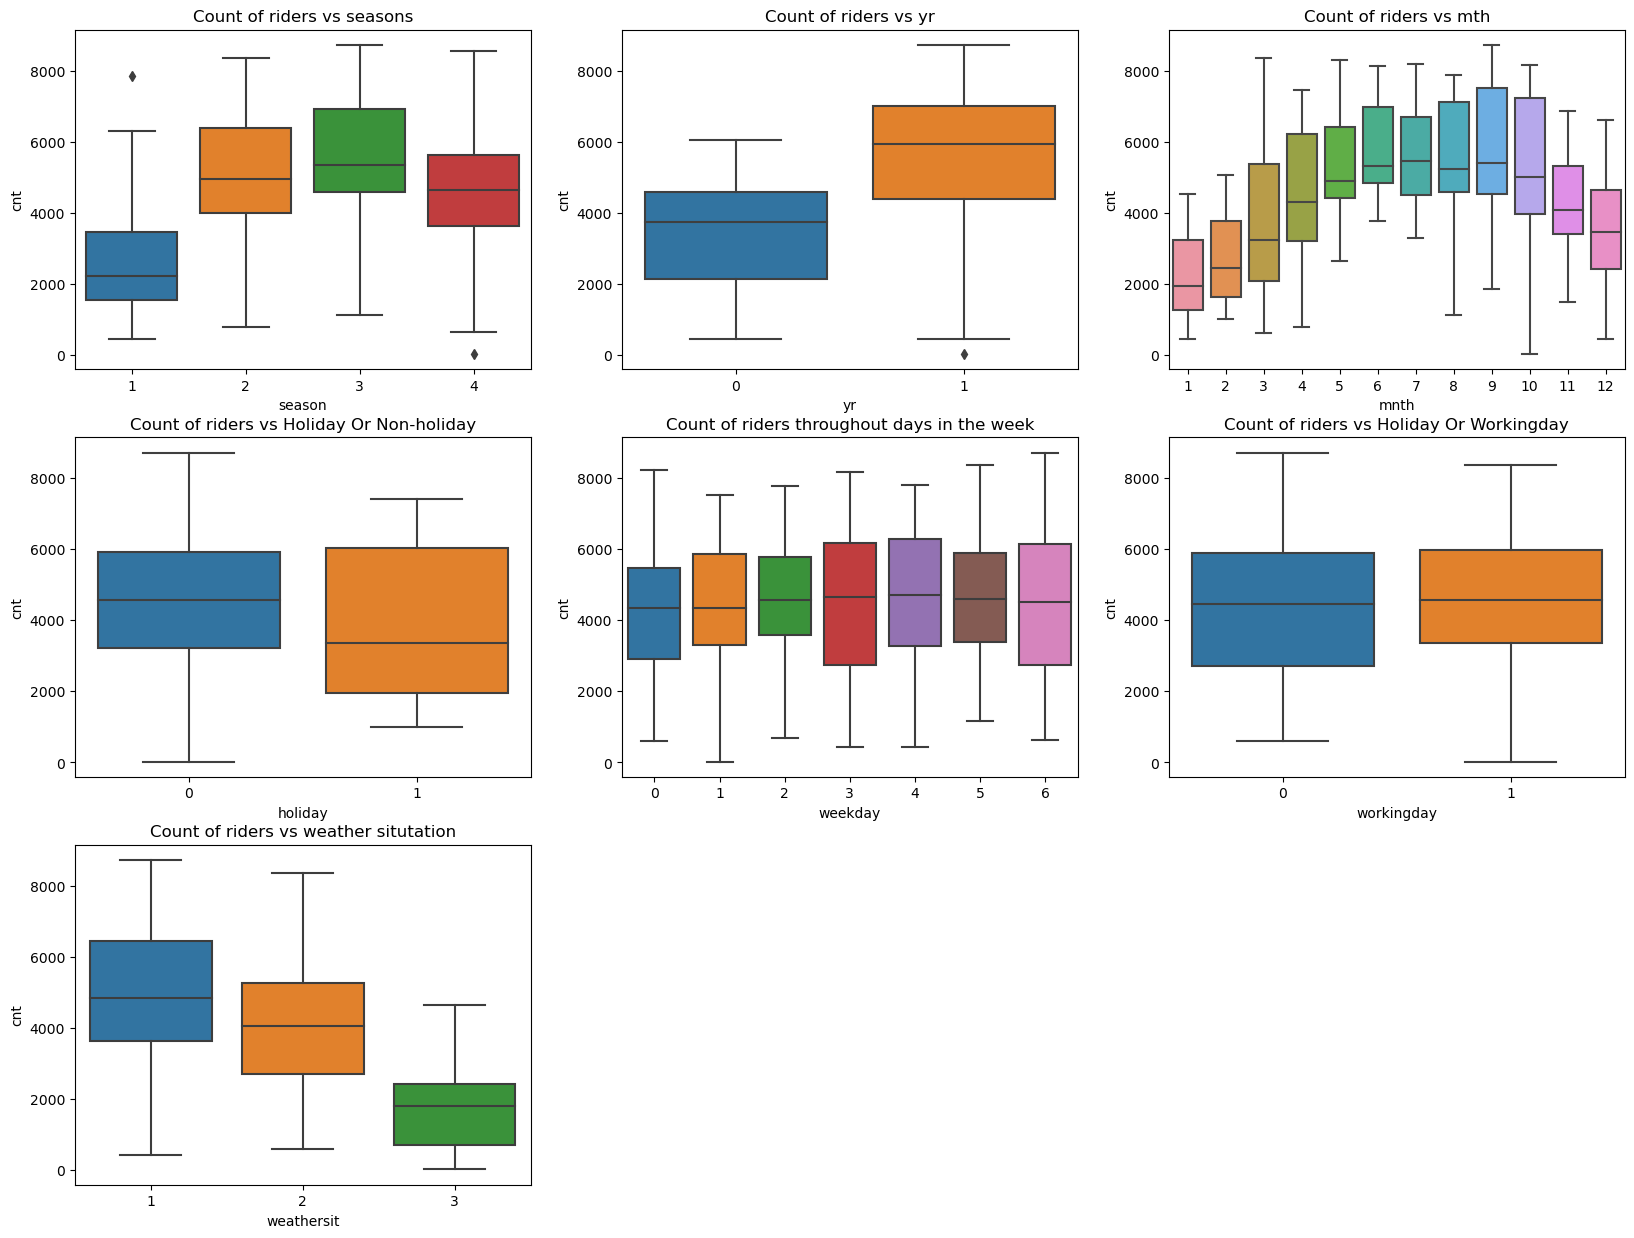

In [10]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,15)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike).set_title('Count of riders vs seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike).set_title('Count of riders vs yr')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike).set_title('Count of riders vs mth')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike).set_title('Count of riders vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike).set_title('Count of riders throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike).set_title('Count of riders vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike).set_title('Count of riders vs weather situtation')

plt.show()

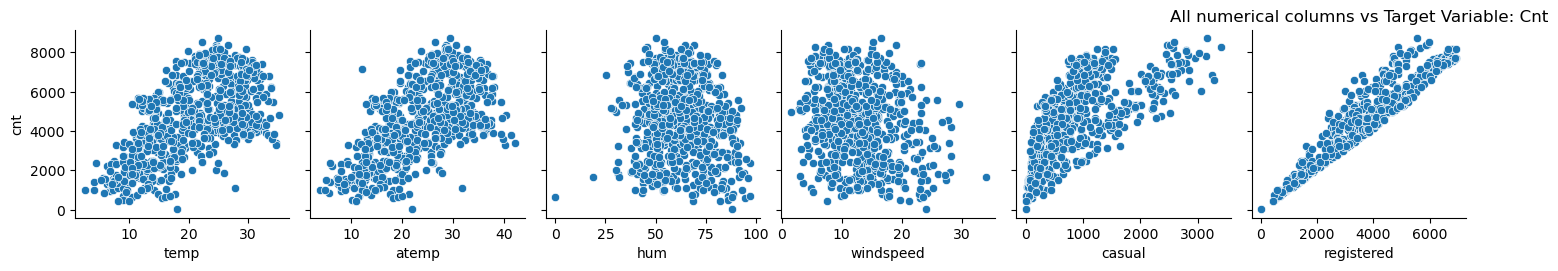

In [11]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(bike,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

## Step 3: Data Preparation

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [12]:
#As mentioned in the problem statement adding meaningful value to numeric categorical variables
bike['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike['yr'].replace({0:'2018',1:'2019'},inplace=True)
bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bike['holiday'].replace({0:'NoHoliday',1:'Holiday'},inplace=True)
bike['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)
bike['workingday'].replace({0:'working',1:'no_working'},inplace=True)
bike['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

### Dummy Variables
The variables 'yr','holiday','workingday','season','mnth','weekday','weathersit'. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.



In [13]:
# 1. Convert the categorical data into dummy variables with drop_first so that the machine uses k-1 columns
# Create a new dataframe to store them
dummy_df=pd.get_dummies(bike[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
dummy_df.head()

,yr_2019,holiday_NoHoliday,workingday_working,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [14]:
bk_final=pd.concat([bike,dummy_df],axis=1)
bk_final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,NoHoliday,Sun,working,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,NoHoliday,Mon,working,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,NoHoliday,Tue,no_working,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,NoHoliday,Wed,no_working,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,NoHoliday,Thurs,no_working,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [15]:
#dropping redundant variables
var_ls= ['season','yr','holiday','mnth','workingday','weekday','weathersit']

bk_final=bk_final.drop(var_ls,axis=1)
bk_final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_NoHoliday,workingday_working,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [16]:
#split
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split


In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bk_final, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


### Rescaling the Features 

Rescaling non categorical columns 'temp','atemp','hum','windspeed','casual','registered','cnt':

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [18]:
# scale
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
varls=['temp','atemp','hum','windspeed','casual','registered','cnt']
df_train[varls]=scaler.fit_transform(df_train[varls]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_NoHoliday,workingday_working,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
653,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,1,1,0,...,1,0,0,0,0,0,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,...,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,...,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,1,...,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [20]:
df_train.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_NoHoliday,workingday_working,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.507843,0.974510,0.323529,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.343137,0.029412
std,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.500429,0.157763,0.468282,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


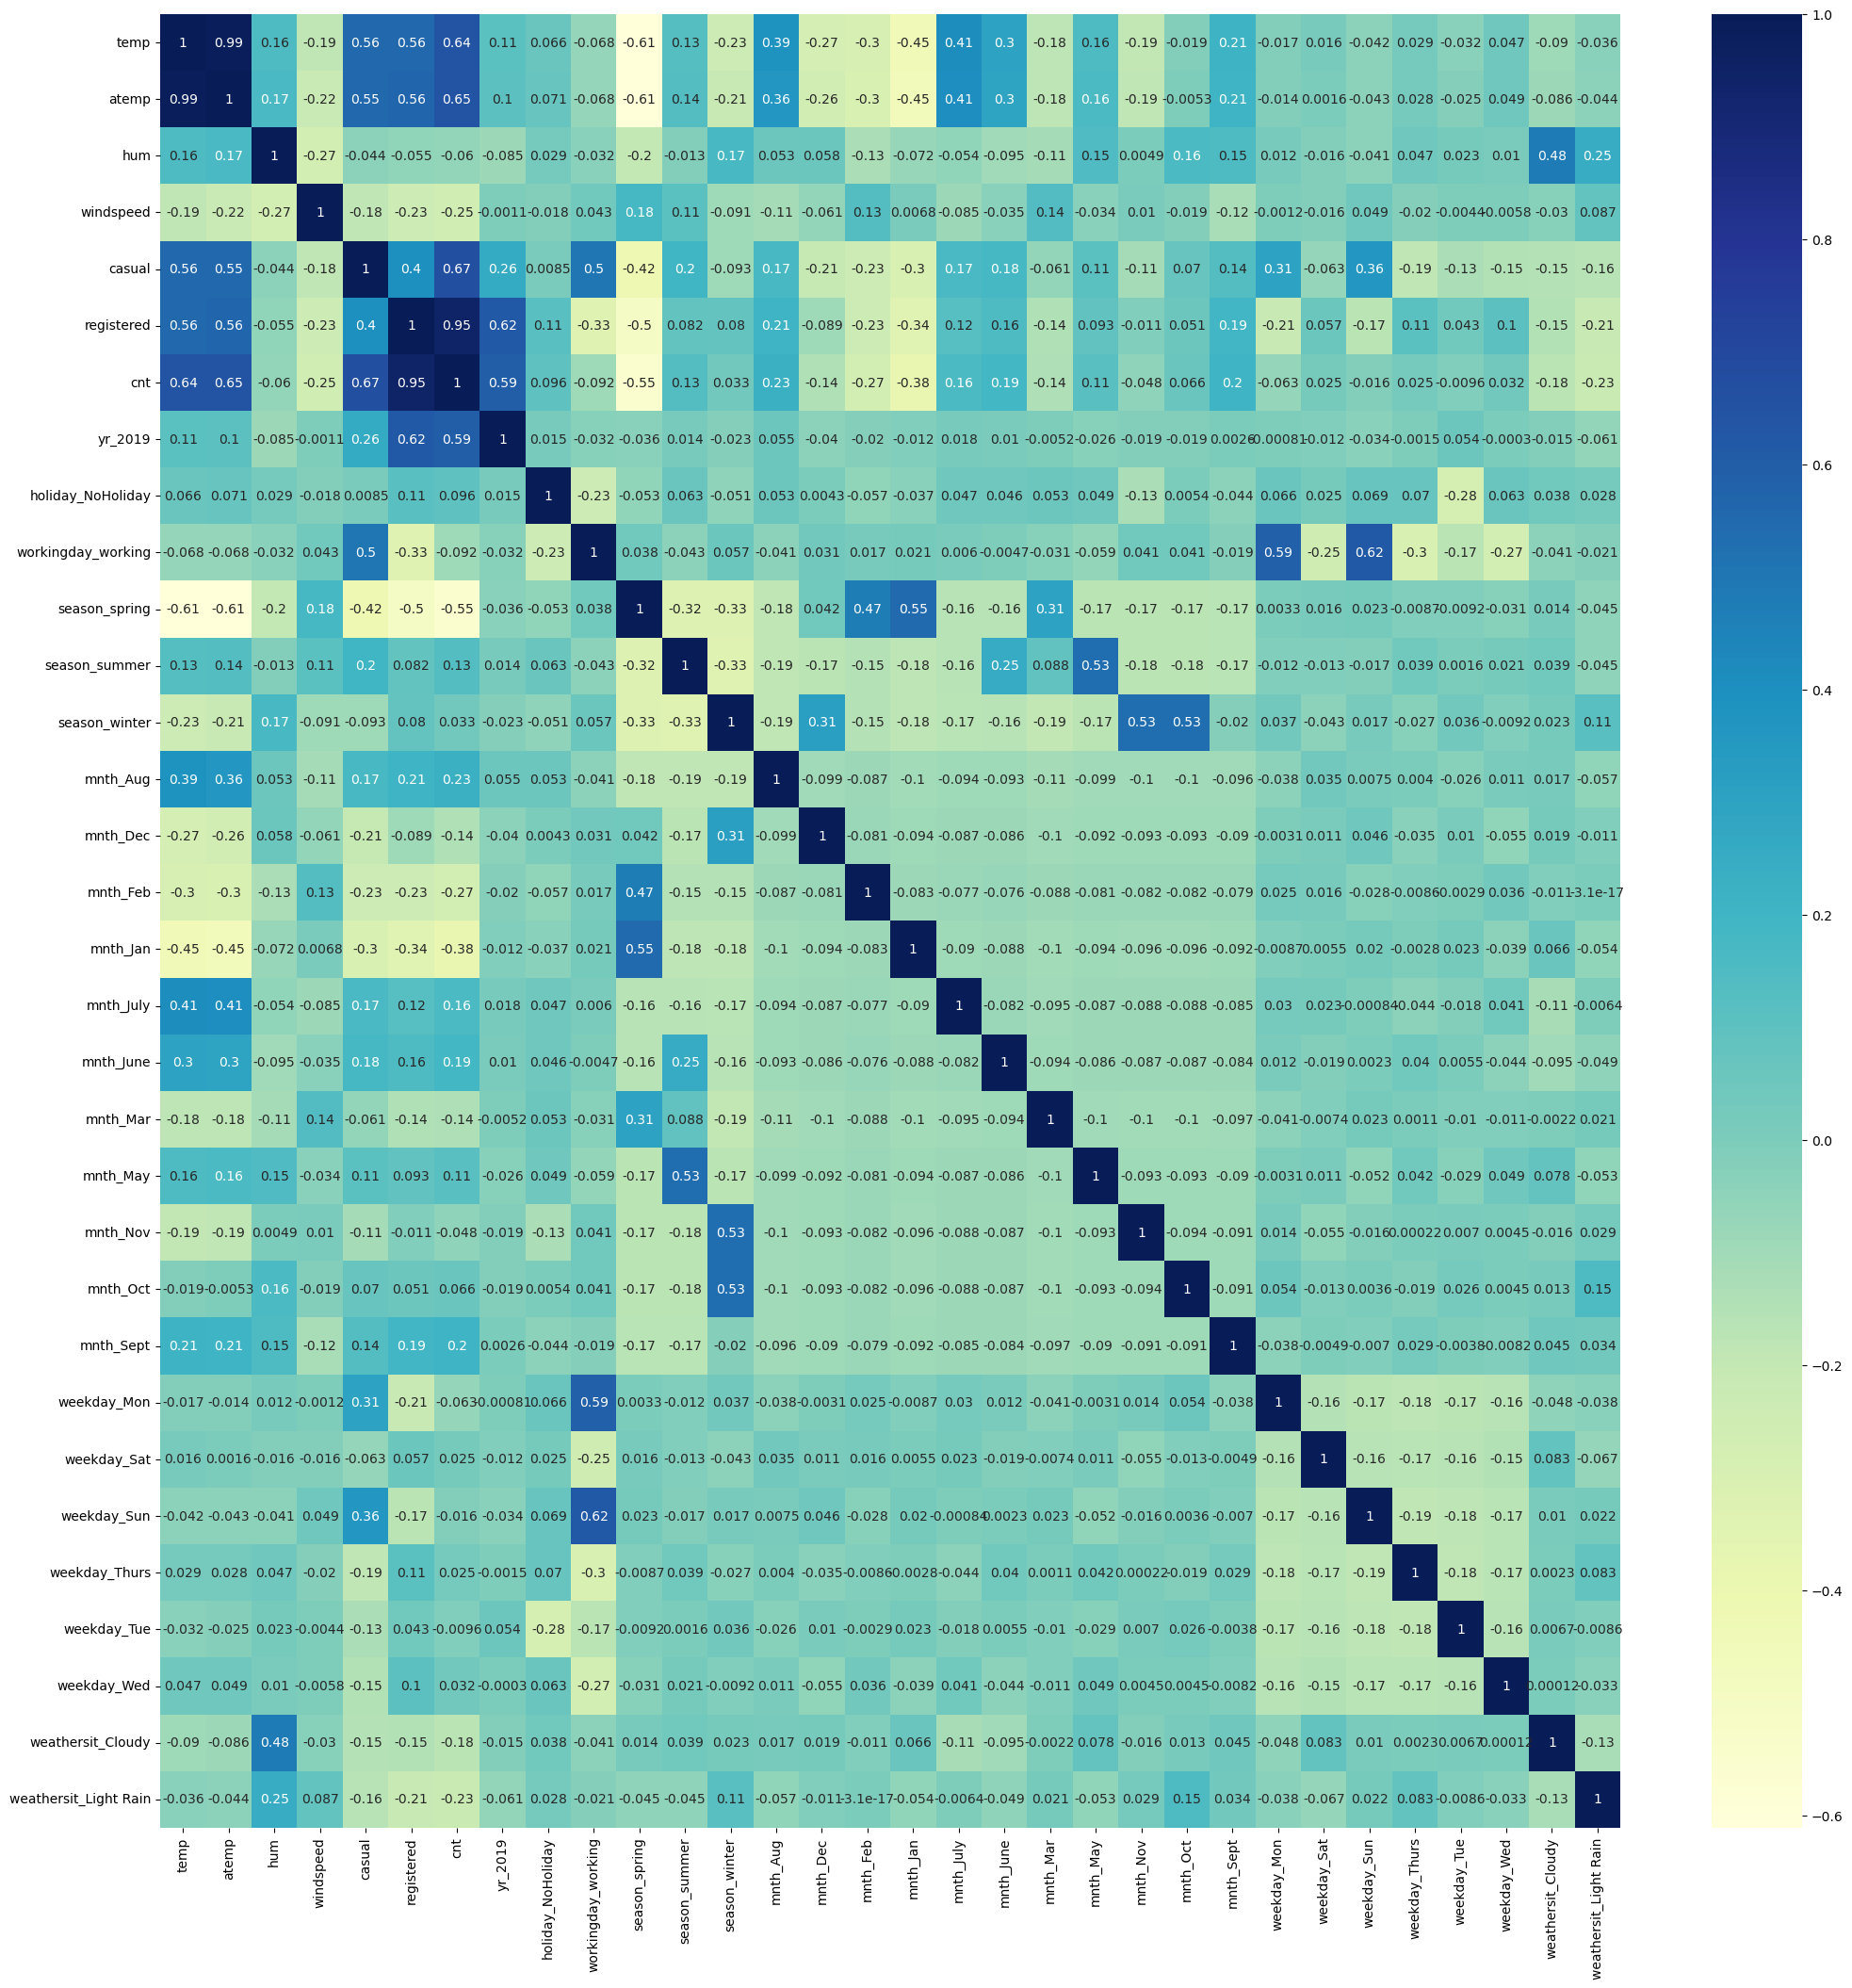

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `registered` seems to the correlated to `cnt` the most. Let's see a pairplot for `registered` vs `cnt`.

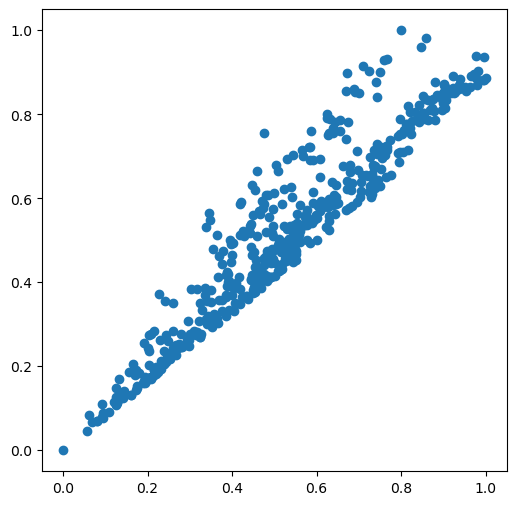

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

So, we pick 'registered' as the first variable and we'll try to fit a regression line to that

### Dividing into X and Y sets for the model building

In [23]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

# Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [24]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['registered']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [25]:
# Check the parameters obtained

lr.params

const         0.024532
registered    0.933473
dtype: float64

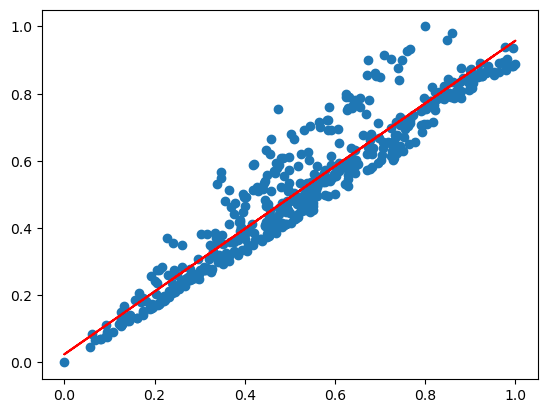

In [26]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.0245 + 0.933*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [27]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.75e-255
Time:                        11:10:02   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

# Adding another variable
The R-squared value obtained is 0.899. Since we have so many variables, lets add other variables

In [28]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered', 'atemp']]

In [29]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.017655
registered    0.841367
atemp         0.176309
dtype: float64

In [30]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2854.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.18e-276
Time:                        11:10:02   Log-Likelihood:                 677.62
No. Observations:                 510   AIC:                            -1349.
Df Residuals:                     507   BIC:                            -1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0177      0.008     -2.174      0.0

## Adding all variables

In [31]:
bk_final.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'yr_2019', 'holiday_NoHoliday', 'workingday_working', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [32]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    1.137979e-15
temp                     6.661338e-16
atemp                   -4.440892e-16
hum                     -5.828671e-16
windspeed               -4.996004e-16
casual                   3.774735e-01
registered               7.968247e-01
yr_2019                  1.908196e-16
holiday_NoHoliday       -2.341877e-16
workingday_working      -1.578598e-16
season_spring            1.110223e-16
season_summer           -1.387779e-16
season_winter           -1.873501e-16
mnth_Aug                -2.775558e-16
mnth_Dec                 4.857226e-17
mnth_Feb                -2.775558e-17
mnth_Jan                -2.289835e-16
mnth_July                3.122502e-17
mnth_June               -3.400058e-16
mnth_Mar                -1.283695e-16
mnth_May                -1.318390e-16
mnth_Nov                -2.914335e-16
mnth_Oct                -5.551115e-17
mnth_Sept                1.179612e-16
weekday_Mon              1.040834e-16
weekday_Sat             -5.204170e-18
weekday_Sun 

In [33]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.513e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:02   Log-Likelihood:                 17493.
No. Observations:                 510   AIC:                        -3.492e+04
Df Residuals:                     479   BIC:                        -3.479e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.138e-

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### 𝑉𝐼𝐹𝑖=1/1−𝑅𝑖2
 

In [34]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_NoHoliday,146.27
0,temp,68.69
8,workingday_working,60.05
1,atemp,56.24
25,weekday_Sun,35.14
23,weekday_Mon,33.15
9,season_spring,10.89
11,season_winter,10.00
10,season_summer,8.41
5,registered,7.77


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.326` and vif `56.25`. Let's go ahead and drop this variable

In [36]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [37]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [38]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.417e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:02   Log-Likelihood:                 17251.
No. Observations:                 510   AIC:                        -3.444e+04
Df Residuals:                     480   BIC:                        -3.431e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.082e-

In [39]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_NoHoliday,146.27
7,workingday_working,60.02
24,weekday_Sun,35.11
22,weekday_Mon,33.12
8,season_spring,10.87
10,season_winter,9.99
0,temp,8.61
9,season_summer,8.39
4,registered,7.76
19,mnth_Nov,6.82


In [40]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('holiday_NoHoliday', 1)

In [41]:
X.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'yr_2019',
       'workingday_working', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [42]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.910e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:03   Log-Likelihood:                 17103.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     480   BIC:                        -3.402e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.441e-

In [44]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,52.55
4,registered,41.56
1,hum,38.70
6,workingday_working,16.85
9,season_winter,13.02
7,season_spring,11.98
3,casual,11.28
23,weekday_Sun,9.37
21,weekday_Mon,8.55
8,season_summer,7.70


In [45]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Dec', 1)

In [46]:
X.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'yr_2019',
       'workingday_working', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [47]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [48]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.644e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:03   Log-Likelihood:                 17320.
No. Observations:                 510   AIC:                        -3.458e+04
Df Residuals:                     481   BIC:                        -3.446e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.665e-

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.91
4,registered,40.27
1,hum,33.52
6,workingday_working,16.65
3,casual,11.17
7,season_spring,10.79
9,season_winter,9.49
22,weekday_Sun,9.37
20,weekday_Mon,8.54
8,season_summer,7.35


In [50]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Mar', 1)

In [51]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.454e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:03   Log-Likelihood:                 17147.
No. Observations:                 510   AIC:                        -3.424e+04
Df Residuals:                     482   BIC:                        -3.412e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.665e-

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.90
4,registered,40.18
1,hum,33.49
6,workingday_working,16.58
3,casual,11.12
9,season_winter,9.45
21,weekday_Sun,9.35
7,season_spring,8.59
19,weekday_Mon,8.53
8,season_summer,7.21


In [54]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Feb', 1)

In [55]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [56]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.359e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:03   Log-Likelihood:                 16399.
No. Observations:                 510   AIC:                        -3.274e+04
Df Residuals:                     483   BIC:                        -3.263e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.027e-

In [57]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,50.84
4,registered,40.06
1,hum,33.44
6,workingday_working,16.48
3,casual,11.03
9,season_winter,9.45
20,weekday_Sun,9.34
18,weekday_Mon,8.53
7,season_spring,7.33
8,season_summer,7.19


In [58]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Thurs', 1)

In [59]:
# Build a 7th fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [60]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.392e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:04   Log-Likelihood:                 16395.
No. Observations:                 510   AIC:                        -3.274e+04
Df Residuals:                     484   BIC:                        -3.263e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.882e-

In [61]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,50.81
4,registered,39.59
1,hum,33.09
6,workingday_working,16.48
3,casual,11.00
9,season_winter,9.41
20,weekday_Sun,8.93
18,weekday_Mon,8.17
7,season_spring,7.16
8,season_summer,7.08


In [62]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Aug', 1)

In [63]:
# Build a 8th fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.870e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:04   Log-Likelihood:                 17156.
No. Observations:                 510   AIC:                        -3.426e+04
Df Residuals:                     485   BIC:                        -3.416e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.776e-

In [65]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.63
4,registered,38.20
1,hum,32.79
6,workingday_working,16.47
3,casual,10.96
19,weekday_Sun,8.88
17,weekday_Mon,8.12
9,season_winter,7.19
5,yr_2019,5.85
2,windspeed,5.38


In [66]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Oct', 1)

In [67]:
# Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.352e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:04   Log-Likelihood:                 17093.
No. Observations:                 510   AIC:                        -3.414e+04
Df Residuals:                     486   BIC:                        -3.404e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.11e-

In [69]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.29
4,registered,37.65
1,hum,32.73
6,workingday_working,16.46
3,casual,10.44
18,weekday_Sun,8.81
16,weekday_Mon,8.09
5,yr_2019,5.84
2,windspeed,5.35
9,season_winter,4.97


In [70]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Wed', 1)

In [71]:
# Build a 10th fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.643e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:04   Log-Likelihood:                 16854.
No. Observations:                 510   AIC:                        -3.366e+04
Df Residuals:                     487   BIC:                        -3.357e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   4.58e-

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.14
4,registered,37.65
1,hum,32.59
6,workingday_working,16.46
3,casual,10.43
18,weekday_Sun,8.71
16,weekday_Mon,7.99
5,yr_2019,5.84
2,windspeed,5.34
9,season_winter,4.94


In [74]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Sat', 1)

In [75]:
# Build a 11th fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.049e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 16863.
No. Observations:                 510   AIC:                        -3.368e+04
Df Residuals:                     488   BIC:                        -3.359e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.714e-

In [77]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.14
4,registered,37.64
1,hum,32.50
6,workingday_working,16.46
3,casual,10.18
17,weekday_Sun,8.52
16,weekday_Mon,7.83
5,yr_2019,5.84
2,windspeed,5.31
9,season_winter,4.93


In [78]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Nov', 1)

In [79]:
# Build a 12th fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.426e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 16929.
No. Observations:                 510   AIC:                        -3.382e+04
Df Residuals:                     489   BIC:                        -3.373e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.412e-

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,40.03
4,registered,37.62
1,hum,32.42
6,workingday_working,16.15
3,casual,10.16
16,weekday_Sun,8.39
15,weekday_Mon,7.72
5,yr_2019,5.84
2,windspeed,5.25
9,season_winter,4.54


In [82]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Mon', 1)

In [83]:
# Build a 13th fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.387e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 16908.
No. Observations:                 510   AIC:                        -3.378e+04
Df Residuals:                     490   BIC:                        -3.369e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.604e-

In [85]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,39.75
4,registered,37.59
1,hum,32.18
3,casual,9.87
5,yr_2019,5.84
6,workingday_working,5.40
2,windspeed,5.24
9,season_winter,4.53
7,season_spring,4.52
8,season_summer,4.00


In [86]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Sun', 1)

In [87]:
# Build a 14th fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.203e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 16644.
No. Observations:                 510   AIC:                        -3.325e+04
Df Residuals:                     491   BIC:                        -3.317e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.053e-

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,39.32
4,registered,36.79
1,hum,32.10
3,casual,9.78
5,yr_2019,5.71
2,windspeed,5.22
7,season_spring,4.52
9,season_winter,4.51
6,workingday_working,4.45
8,season_summer,3.99


In [90]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_Jan', 1)

In [91]:
# Build a 15th fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.373e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 17171.
No. Observations:                 510   AIC:                        -3.431e+04
Df Residuals:                     492   BIC:                        -3.423e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.776e-

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,38.44
4,registered,36.78
1,hum,31.03
3,casual,9.77
5,yr_2019,5.70
2,windspeed,5.21
9,season_winter,4.48
6,workingday_working,4.44
7,season_spring,4.22
8,season_summer,3.99


In [94]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Tue', 1)

In [95]:
# Build a 16th fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.784e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 16746.
No. Observations:                 510   AIC:                        -3.346e+04
Df Residuals:                     493   BIC:                        -3.339e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.633e-

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,38.40
4,registered,36.72
1,hum,30.83
3,casual,9.75
5,yr_2019,5.66
2,windspeed,5.21
9,season_winter,4.46
6,workingday_working,4.41
7,season_spring,4.22
8,season_summer,3.98


In [98]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_May', 1)

In [99]:
# Build a 17th fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.621e+31
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 17473.
No. Observations:                 510   AIC:                        -3.491e+04
Df Residuals:                     494   BIC:                        -3.485e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.082e-

In [101]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,37.31
4,registered,36.71
1,hum,30.76
3,casual,9.72
5,yr_2019,5.66
2,windspeed,5.03
9,season_winter,4.46
6,workingday_working,4.41
7,season_spring,4.20
8,season_summer,3.18


In [102]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_July', 1)

In [103]:
# Build a 18th fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [104]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.611e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 16989.
No. Observations:                 510   AIC:                        -3.395e+04
Df Residuals:                     495   BIC:                        -3.388e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.22e-

In [105]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,36.61
0,temp,33.75
1,hum,30.66
3,casual,9.66
5,yr_2019,5.65
2,windspeed,5.03
6,workingday_working,4.39
9,season_winter,4.36
7,season_spring,4.14
8,season_summer,2.99


In [106]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_June', 1)

In [107]:
# Build a 19th fitted model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [108]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.886e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 17071.
No. Observations:                 510   AIC:                        -3.411e+04
Df Residuals:                     496   BIC:                        -3.405e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.853e-

In [109]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [110]:
# Build a 20th fitted model
X_train_lm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm).fit()

In [111]:
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.270e+29
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 16622.
No. Observations:                 510   AIC:                        -3.322e+04
Df Residuals:                     497   BIC:                        -3.316e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.076e-

In [112]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,35.98
0,temp,21.24
2,casual,9.25
4,yr_2019,5.59
1,windspeed,4.87
5,workingday_working,4.19
8,season_winter,3.13
6,season_spring,2.41
7,season_summer,2.27
10,weathersit_Cloudy,1.72


In [113]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('season_spring', 1)

In [114]:
# Build a 21st fitted model
X_train_lm = sm.add_constant(X)

lr_21 = sm.OLS(y_train, X_train_lm).fit()

In [115]:
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.541e+30
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                 17118.
No. Observations:                 510   AIC:                        -3.421e+04
Df Residuals:                     498   BIC:                        -3.416e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.041e-

In [116]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,31.29
0,temp,19.22
2,casual,8.73
4,yr_2019,5.49
1,windspeed,3.74
5,workingday_working,3.59
7,season_winter,2.27
6,season_summer,1.81
9,weathersit_Cloudy,1.63
10,weathersit_Light Rain,1.32


In [117]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('registered', 1)

In [118]:
# Build a 22nd fitted model
X_train_lm = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm).fit()

In [119]:
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     476.8
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          4.99e-248
Time:                        11:10:06   Log-Likelihood:                 639.45
No. Observations:                 510   AIC:                            -1257.
Df Residuals:                     499   BIC:                            -1210.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [120]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,casual,8.53
0,temp,7.86
1,windspeed,3.64
4,workingday_working,2.83
3,yr_2019,2.25
5,season_summer,1.72
8,weathersit_Cloudy,1.58
6,season_winter,1.40
7,mnth_Sept,1.22
9,weathersit_Light Rain,1.13


In [121]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('casual', 1)

In [122]:
# Build a 23rd fitted model
X_train_lm = sm.add_constant(X)

lr_23 = sm.OLS(y_train, X_train_lm).fit()

In [123]:
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.3
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          4.34e-185
Time:                        11:10:06   Log-Likelihood:                 488.08
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     500   BIC:                            -913.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [124]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.75
1,windspeed,3.16
2,yr_2019,2.00
4,season_summer,1.56
7,weathersit_Cloudy,1.47
3,workingday_working,1.44
5,season_winter,1.39
6,mnth_Sept,1.20
8,weathersit_Light Rain,1.08


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [125]:
y_train_cnt = lr_23.predict(X_train_lm)

In [126]:
X_train_lm.head()

,const,temp,windspeed,yr_2019,workingday_working,season_summer,season_winter,mnth_Sept,weathersit_Cloudy,weathersit_Light Rain
653,1.0,0.509887,0.300794,1,0,0,1,0,0,0
576,1.0,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,0.442393,0.255342,1,1,0,0,0,1,0
728,1.0,0.245101,0.663106,1,1,0,0,0,0,0
482,1.0,0.395666,0.188475,1,1,1,0,0,1,0


Text(0.5, 0, 'Errors')

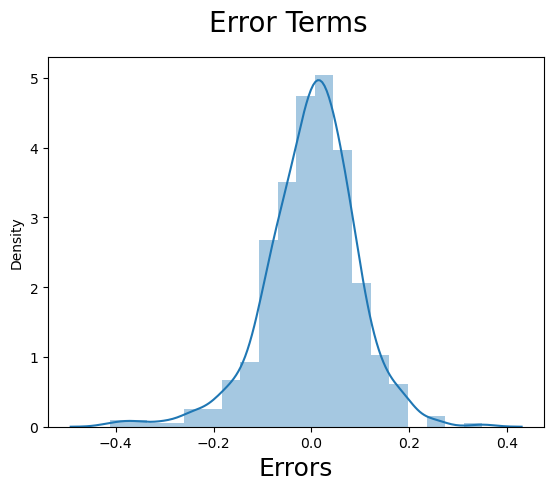

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eighteenth model.

#### Applying the scaling on the test sets

In [128]:
varls=['temp','atemp','hum','windspeed','casual','registered','cnt']
df_test[varls]=scaler.fit_transform(df_test[varls]) 
df_test.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_NoHoliday,workingday_working,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068,0.704300,0,0,1,...,0,0,0,0,0,0,1,0,1,0
535,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284,0.725421,1,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888,0.278853,0,1,0,...,1,0,0,0,0,0,0,0,1,0
221,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237,0.545512,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639,0.569148,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_test.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_NoHoliday,workingday_working,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.546312,0.530942,0.508750,0.418870,0.254916,0.505149,0.516216,0.479452,0.963470,0.301370,...,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.319635,0.027397
std,0.249189,0.228159,0.201253,0.188111,0.209581,0.235390,0.238702,0.500722,0.188034,0.459904,...,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328479,0.333829,0.358469,0.283817,0.096295,0.323690,0.359882,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546045,0.547913,0.494200,0.402533,0.213761,0.504523,0.520241,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759735,0.720622,0.651165,0.524362,0.347251,0.653774,0.682487,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [130]:
y_test = df_test.pop('cnt')
X_test = df_test

In [131]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [132]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.75
1,windspeed,3.16
2,yr_2019,2.00
4,season_summer,1.56
7,weathersit_Cloudy,1.47
3,workingday_working,1.44
5,season_winter,1.39
6,mnth_Sept,1.20
8,weathersit_Light Rain,1.08


In [133]:
X_test.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'yr_2019',
       'holiday_NoHoliday', 'workingday_working', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [134]:

X_test_m = X_test_m.drop(columns=[ 'atemp', 'hum', 'casual', 'registered',
       'holiday_NoHoliday', 'season_spring',
         'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
        ],axis=1)

In [135]:
X_test_m.shape


(219, 10)

In [136]:
# Making predictions using the fourth model

y_pred_m23 = lr_23.predict(X_test_m)

In [137]:
y_test.shape

(219,)

In [138]:
y_pred_m23.shape

(219,)

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

In [139]:
lr_23.params

const                    0.130117
temp                     0.550388
windspeed               -0.152445
yr_2019                  0.232475
workingday_working      -0.023759
season_summer            0.087475
season_winter            0.130592
mnth_Sept                0.097518
weathersit_Cloudy       -0.079195
weathersit_Light Rain   -0.282182
dtype: float64

In [140]:
X_test_m.head()

,const,temp,windspeed,yr_2019,workingday_working,season_summer,season_winter,mnth_Sept,weathersit_Cloudy,weathersit_Light Rain
184,1.0,0.837241,0.149393,0,1,0,0,0,1,0
535,1.0,0.911423,0.231142,1,0,1,0,0,0,0
299,1.0,0.496221,0.443398,0,0,0,1,0,1,0
221,1.0,0.890387,0.449707,0,0,0,0,0,0,0
152,1.0,0.821739,0.682387,0,0,1,0,0,0,0


Text(0, 0.5, 'y_pred')

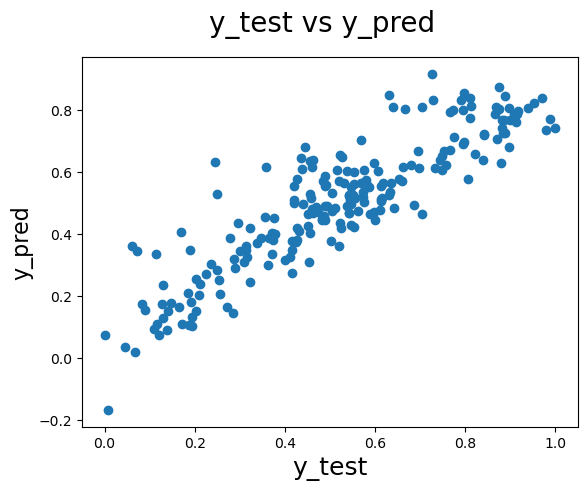

In [141]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m23)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

We can see that the equation of our best fitted line is:

0.1301+0.5504Xtemp-0.1524Xwindspeed+0.2325Xyr_2019-0.0238Xworkingday_working+0.0875Xseason_summer+0.1306Xseason_winter
+0.0975Xmnth_Sept-0.0792Xweathersit_Cloudy-0.2822Xweathersit_LightRain

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m23)
r_squared = r2_score(y_test, y_pred_m23)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
residuals =y_test.values-y_pred_m23
residuals

In [ ]:
import matplotlib.pyplot as plt

#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m23, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

In [ ]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_m23, color="blue", linewidth=1, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [ ]:
valsn = 0.1301+0.5504*X_test_m.iloc[:, 1]-0.1524*X_test_m.iloc[:, 2]+0.2325*X_test_m.iloc[:, 3]-0.0238*X_test_m.iloc[:, 4]+0.0875*X_test_m.iloc[:, 5]+0.1306*X_test_m.iloc[:, 6]
+0.0975*X_test_m.iloc[:, 7]-0.0792*X_test_m.iloc[:, 8]-0.2822*X_test_m.iloc[:, 9]

In [ ]:
lr_23.params